In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy.stats import spearmanr, pearsonr

In [48]:
df = pd.read_excel("player_salaries_2014_2018_test.xlsx", index_col = 0)

In [49]:
df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,Register Value,Salary in $,Season End,Full Team Name
0,2014,Steven Adams,C,20,OKC,81,20,1197,11.2,0.541,...,43,40,57,71,203,265,10096,2184960,2015,Oklahoma City Thunder
1,2014,Alexis Ajinca,C,25,NOH,56,30,951,14.6,0.589,...,40,23,46,63,187,328,9640,981084,2015,New Orleans Pelicans
2,2014,Cole Aldrich,C,25,NYK,46,2,330,19.1,0.620,...,14,8,30,18,40,92,9721,981084,2015,New York Knicks
3,2014,LaMarcus Aldridge,PF,28,POR,69,69,2498,21.8,0.507,...,178,63,68,123,147,1603,9941,16006000,2015,Portland Trail Blazers
4,2014,Lavoy Allen,PF,24,IND,14,0,112,17.5,0.521,...,6,2,6,4,11,40,9947,948163,2015,Indiana Pacers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,2017,Joe Young,PG,24,IND,33,0,135,11.4,0.433,...,15,4,0,5,5,68,11566,1471382,2018,Indiana Pacers
986,2017,Thaddeus Young,PF,28,IND,74,74,2237,14.9,0.562,...,122,114,30,96,135,814,11784,14796348,2018,Indiana Pacers
987,2017,Cody Zeller,PF,24,CHA,62,58,1725,16.7,0.604,...,99,62,58,65,189,639,11404,12584270,2018,Charlotte Hornets
988,2017,Paul Zipser,SF,22,CHI,44,18,843,6.9,0.503,...,36,15,16,40,78,240,11721,1312611,2018,Chicago Bulls


In [50]:
import numpy as np
X = df.drop(['Salary in $', 'Player', 'Full Team Name'], axis = 1)
Y = np.log(df['Salary in $'])


In [51]:
X = pd.get_dummies(X, columns = ['Pos', "Tm"])


In [52]:
X = X.fillna(0)

In [53]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
X_std = StandardScaler.fit_transform(X)

In [54]:
#try with Y std
#Y = Y.reshape(-1,1)
#Y_std = StandardScaler.transform(Y.reshape(-1, 1))

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size =0.33,random_state = 5 )


In [56]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=0.95)
#X_pca= sklearn_pca.fit_transform(X_train)
X_pca = sklearn_pca.fit_transform(X_train)
#Y_pca = sklearn_pca.transform(Y)
Y_pca = sklearn_pca.transform(X_test)

In [57]:
print(X_pca.shape)
print(Y_pca.shape)

(663, 43)
(327, 43)


In [58]:
#X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size =0.33,random_state = 5 )


In [59]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
#LinReg.fit(X_train,Y_train)
LinReg.fit(X_pca,Y_train)
#Y_pred = LinReg.predict(X_test)
Y_pred = LinReg.predict(Y_pca)

In [60]:
len(Y_train)

663

In [61]:
#average of salaries 

In [70]:
import sklearn
import numpy as np
#print("R^2", LinReg.score(Y_pred , Y_test))
#print("R^2", LinReg.score(X_pca , Y_test))
print(LinReg.score(X_pca, Y_train))
# mean absolute error which is the average of all predicted error values ,where all predicted error values are forced to be positive 
print("Mean Absolute Error: ", sklearn.metrics.mean_absolute_error(Y_test, Y_pred))
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error: ", sklearn.metrics.mean_absolute_percentage_error(Y_test, Y_pred))
#MAPE - find
#root mean squared error is the root of the average of the squared predicted error values.
print("RMSE:", np.sqrt(mse))
print(round(spearmanr(Y_test, Y_pred)[0],3))
#round(spearmanr(Y_test, ypred)[0],3)


0.49528538005270106
Mean Absolute Error:  0.6565023962807386
Mean Squared Error: 0.8677632943655472
Mean Absolute Percentage Error:  0.045504852295322126
RMSE: 0.9315381336078234
0.75


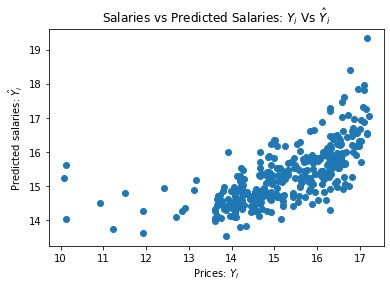

In [63]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted salaries: $\hat{Y}_i$")
plt.title("Salaries vs Predicted Salaries: $Y_i$ Vs $\hat{Y}_i$")
plt.show()

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85)

# Baseline

In [65]:
y_baseline = np.mean(Y_train)

In [82]:
baseline_fit = np.mean(Y_train)

# compute root mean square error (RMSE) for each model
print(
    'RMSE baseline model on Training Data:', np.sqrt(np.mean((Y_train - baseline_fit)**2))
)

# compute mean square error (MSE) for each model
print(
    'RMSE baseline model on Testing Data:', np.sqrt(np.mean((Y_test - baseline_fit)**2))
)


RMSE baseline model on Training Data: 1.1238109716675213
RMSE baseline model on Testing Data: 1.2484509244770698


In [68]:
np.array(Y_test)

array([15.01948326, 13.91136786, 16.32916662, 13.86652871, 14.08752884,
       16.9827166 , 16.30041721, 16.26327766, 14.70033539, 14.59776691,
       14.05528623, 13.64716173, 16.30041721, 15.31958795, 15.80748607,
       14.92943797, 16.58847421, 16.68069037, 14.25107801, 12.89921983,
       16.30041721, 14.09072194, 16.11809565, 16.75971919, 10.1266311 ,
       17.01660442, 14.45157932, 15.94290858, 16.50648242, 15.8402744 ,
       13.68767719, 16.04113458, 14.89640175, 15.90074777, 16.30041721,
       14.55412811, 16.15124789, 15.93577417, 16.23462946, 13.81551056,
       15.64865522, 10.08672536, 14.91412285, 14.25483524, 14.5029012 ,
       14.75103905, 15.42494847, 16.51113825, 14.87112836, 16.08811004,
       13.68156308, 14.91180015, 13.76134578, 15.25159458, 17.13838507,
       12.4292162 , 16.19926136, 15.32038763, 15.16964272, 16.23911947,
       14.85011752, 15.06827353, 15.05595482, 14.82756955, 16.84295465,
       15.06827353, 13.15622359, 15.71092784, 16.13314307, 15.76

In [21]:
print(
    'MAE baseline model on Testing Data:', np.mean(abs(Y_test-baseline_fit))
)

MAE baseline model on Testing Data: 0.9957579031146466


In [22]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

print(
    'MAPE baseline model on Testing Data:', mape(Y_test, baseline_fit)
)

MAPE baseline model on Testing Data: 6.791435040611297


In [23]:
#https://datagy.io/mape-python/
def mape_2(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape
print(
    'MAPE baseline model on Testing Data:', mape_2(Y_test, baseline_fit)
)

MAPE baseline model on Testing Data: 0.06791435040611297


# SGDRegressor

In [24]:
from sklearn.linear_model import SGDRegressor

In [25]:
sgdr = SGDRegressor()

In [26]:
sgdr.fit(X_pca, Y_train)

#score = sgdr.score(X_pca, Y_train)
#print("R-squared:", score)


SGDRegressor()

In [27]:
ypred = sgdr.predict(Y_pca)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("Mean Absolute Error: ", sklearn.metrics.mean_absolute_error(Y_test, ypred))
mse = sklearn.metrics.mean_squared_error(Y_test, ypred)
print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error: ", sklearn.metrics.mean_absolute_percentage_error(Y_test, ypred))
#MAPE - find
#root mean squared error is the root of the average of the squared predicted error values.
print("RMSE:", np.sqrt(mse))

MSE:  0.8800256102996424
RMSE:  0.9380968022009468
Mean Absolute Error:  0.6623861656408228
Mean Squared Error: 0.8800256102996424
Mean Absolute Percentage Error:  0.045822129885097033
RMSE: 0.9380968022009468


In [28]:
round(spearmanr(Y_test, ypred)[0],3)


0.745

# Gradient Boosting Regressor

In [29]:
from sklearn.ensemble import GradientBoostingRegressor


In [30]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_pca, Y_train)

GradientBoostingRegressor(random_state=0)

In [31]:
score = reg.score(X_pca, Y_train)
print("R-squared:", score)


R-squared: 0.8411848296194072


In [32]:
ypred = reg.predict(Y_pca)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("Mean Absolute Error: ", sklearn.metrics.mean_absolute_error(Y_test, ypred))
mse = sklearn.metrics.mean_squared_error(Y_test, ypred)
print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error: ", sklearn.metrics.mean_absolute_percentage_error(Y_test, ypred))
#MAPE - find
#root mean squared error is the root of the average of the squared predicted error values.
print("RMSE:", np.sqrt(mse))

MSE:  0.8886135435210459
RMSE:  0.9426630063395115
Mean Absolute Error:  0.6853239056144095
Mean Squared Error: 0.8886135435210459
Mean Absolute Percentage Error:  0.04733204682186609
RMSE: 0.9426630063395115


In [33]:
from scipy.stats import spearmanr, pearsonr
#round(spearman[0], 3))
round(spearmanr(Y_test, ypred)[0],3)


0.714

# Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(X_pca, Y_train)
#score = regr.score(X_pca, Y_train)
print("R-squared:", score)


R-squared: 0.8411848296194072


In [35]:
ypred = regr.predict(Y_pca)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("Mean Absolute Error: ", sklearn.metrics.mean_absolute_error(Y_test, ypred))
mse = sklearn.metrics.mean_squared_error(Y_test, ypred)
print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error: ", sklearn.metrics.mean_absolute_percentage_error(Y_test, ypred))
#MAPE - find
#root mean squared error is the root of the average of the squared predicted error values.
print("RMSE:", np.sqrt(mse))
#print(regr.score(ypred, np.array(Y_test).reshape(1,-1)))

MSE:  0.8358447161660162
RMSE:  0.9142454354089039
Mean Absolute Error:  0.6694918395333495
Mean Squared Error: 0.8358447161660162
Mean Absolute Percentage Error:  0.046158166176135995
RMSE: 0.9142454354089039


In [36]:
round(spearmanr(Y_test, ypred)[0],3)


0.732

In [37]:
#Take the one with the lowest RMSE and do hyper parameter tuning on it
#GradientBoostingRegressor has highest R2 will do hyperparameter tuning on this classifier using RandomSearch


In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
  'learning_rate': ['constant', 'optimal', 'invscaling','adaptive'], 
  'loss': ['squared_error', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive'],
    'max_iter':[1000,2000,3000,5000]
}
grid = GridSearchCV(SGDRegressor(), param_grid, refit=True, verbose=3)
grid.fit(X_pca,Y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END learning_rate=constant, loss=squared_error, max_iter=1000;, score=-0.155 total time=   0.0s
[CV 2/5] END learning_rate=constant, loss=squared_error, max_iter=1000;, score=0.057 total time=   0.0s
[CV 3/5] END learning_rate=constant, loss=squared_error, max_iter=1000;, score=0.220 total time=   0.0s
[CV 4/5] END learning_rate=constant, loss=squared_error, max_iter=1000;, score=-0.055 total time=   0.0s
[CV 5/5] END learning_rate=constant, loss=squared_error, max_iter=1000;, score=-0.378 total time=   0.0s
[CV 1/5] END learning_rate=constant, loss=squared_error, max_iter=2000;, score=0.136 total time=   0.0s
[CV 2/5] END learning_rate=constant, loss=squared_error, max_iter=2000;, score=0.310 total time=   0.0s
[CV 3/5] END learning_rate=constant, loss=squared_error, max_iter=2000;, score=0.055 total time=   0.0s
[CV 4/5] END learning_rate=constant, loss=squared_error, max_iter=2000;, score=-0.279 total time=   0.0

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['squared_error', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'max_iter': [1000, 2000, 3000, 5000]},
             verbose=3)

In [44]:
print(grid.best_params_)

# Find the best estimator
print(grid.best_estimator_)

{'learning_rate': 'invscaling', 'loss': 'squared_error', 'max_iter': 1000}
SGDRegressor()


In [46]:
grid_pred = grid.predict(Y_pca)
mse = mean_squared_error(Y_test, grid_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("Mean Absolute Error: ", sklearn.metrics.mean_absolute_error(Y_test, grid_pred))
round(spearmanr(Y_test, grid_pred)[0],3)

MSE:  0.8875696887986074
RMSE:  0.9421091703187097
Mean Absolute Error:  0.6665862894414627


0.746

In [ ]:
#Have the lowest RMSE now from this classifier I believe

In [75]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
  'n_jobs': [1,2,3,5,6], 
  'positive': [True, False]#,
    #'max_iter':[1000,2000,3000,5000]
}
grid = GridSearchCV(LinearRegression(), param_grid, refit=True, verbose=3)
grid.fit(X_pca,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...........n_jobs=1, positive=True;, score=0.315 total time=   0.0s
[CV 2/5] END ...........n_jobs=1, positive=True;, score=0.411 total time=   0.0s
[CV 3/5] END ...........n_jobs=1, positive=True;, score=0.461 total time=   0.0s
[CV 4/5] END ...........n_jobs=1, positive=True;, score=0.420 total time=   0.0s
[CV 5/5] END ...........n_jobs=1, positive=True;, score=0.285 total time=   0.0s
[CV 1/5] END ..........n_jobs=1, positive=False;, score=0.372 total time=   0.0s
[CV 2/5] END ..........n_jobs=1, positive=False;, score=0.411 total time=   0.0s
[CV 3/5] END ..........n_jobs=1, positive=False;, score=0.408 total time=   0.0s
[CV 4/5] END ..........n_jobs=1, positive=False;, score=0.470 total time=   0.0s
[CV 5/5] END ..........n_jobs=1, positive=False;, score=0.375 total time=   0.0s
[CV 1/5] END ...........n_jobs=2, positive=True;, score=0.315 total time=   0.0s
[CV 2/5] END ...........n_jobs=2, positive=True;

GridSearchCV(estimator=LinearRegression(),
             param_grid={'n_jobs': [1, 2, 3, 5, 6], 'positive': [True, False]},
             verbose=3)

In [76]:
grid_pred = grid.predict(Y_pca)
mse = mean_squared_error(Y_test, grid_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("Mean Absolute Error: ", sklearn.metrics.mean_absolute_error(Y_test, grid_pred))
round(spearmanr(Y_test, grid_pred)[0],3)

MSE:  0.8677632943655472
RMSE:  0.9315381336078234
Mean Absolute Error:  0.6565023962807386


0.75

In [77]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
  'n_estimators': [100,200,300,500,600], 
  'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'max_features': ['sqrt', 'log2', None],
   'oob_score':[True, False]#,
    #'max_iter':[1000,2000,3000,5000]
}
grid = GridSearchCV(RandomForestRegressor(), param_grid, refit=True, verbose=3)
grid.fit(X_pca,Y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=squared_error, max_features=sqrt, n_estimators=100, oob_score=True;, score=0.375 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=sqrt, n_estimators=100, oob_score=True;, score=0.397 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=sqrt, n_estimators=100, oob_score=True;, score=0.428 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_features=sqrt, n_estimators=100, oob_score=True;, score=0.371 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=sqrt, n_estimators=100, oob_score=True;, score=0.393 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=sqrt, n_estimators=100, oob_score=False;, score=0.355 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=sqrt, n_estimators=100, oob_score=False;, score=0.386 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=sqrt, n_estimators=100, 

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300, 500, 600],
                         'oob_score': [True, False]},
             verbose=3)

In [79]:
grid_pred = grid.predict(Y_pca)
mse = mean_squared_error(Y_test, grid_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("Mean Absolute Error: ", sklearn.metrics.mean_absolute_error(Y_test, grid_pred))
print("Mean Absolute Percentage Error: ", sklearn.metrics.mean_absolute_percentage_error(Y_test, ypred))

round(spearmanr(Y_test, grid_pred)[0],3)

MSE:  0.817245355559677
RMSE:  0.9040162363363154
Mean Absolute Error:  0.6499397824271804
Mean Absolute Percentage Error:  0.046158166176135995


0.739

In [80]:
grid.best_params_

{'criterion': 'squared_error',
 'max_features': None,
 'n_estimators': 500,
 'oob_score': False}

In [81]:
grid.best_score_

0.4428656757447971